In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

In [77]:
df=pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [78]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,644


# Data Preprocessing

In [79]:
df.drop(columns="education",inplace=True)

In [80]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [81]:
df["cigsPerDay"].fillna(0,inplace=True)

<ipython-input-81-db42f0bf07a4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cigsPerDay"].fillna(0,inplace=True)


In [82]:
X=df.drop(columns=["TenYearCHD"])
y=df["TenYearCHD"]

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
LR_model=make_pipeline(
    SimpleImputer(strategy="mean"),
    MinMaxScaler(),
    LogisticRegression()
)

In [85]:
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [86]:
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

In [87]:
accuracy_score(y_train,y_training_pred)

0.8539823008849557

In [88]:
accuracy_score(y_test,y_testing_pred)

0.8573113207547169

In [89]:
f1_score(y_test,y_testing_pred)

0.12949640287769784

In [90]:
f1_score(y_train,y_training_pred)

0.1330998248686515

In [91]:
print(classification_report(y_test,y_testing_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



# AUC-ROC Curve

In [92]:
y_testing_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [93]:
y_prob=LR_model.predict_proba(X_test)[:,1]
y_prob

array([0.33866262, 0.08075313, 0.09680282, 0.16264253, 0.06317299,
       0.18856242, 0.08002937, 0.17200441, 0.18929724, 0.39479483,
       0.24503813, 0.24746991, 0.04671   , 0.12298323, 0.2232633 ,
       0.08311394, 0.29271318, 0.12295214, 0.29234317, 0.24120952,
       0.33061313, 0.03516114, 0.07625633, 0.0264458 , 0.15000149,
       0.17083573, 0.08049558, 0.12174624, 0.12550813, 0.06728183,
       0.34018403, 0.09794372, 0.09318559, 0.08529566, 0.06211959,
       0.04012999, 0.08946512, 0.04184178, 0.12935272, 0.08042774,
       0.31777634, 0.11594815, 0.17223264, 0.19382895, 0.05513555,
       0.05002179, 0.16102149, 0.03431183, 0.09911819, 0.22620439,
       0.04403829, 0.38753698, 0.21672355, 0.126999  , 0.0424491 ,
       0.10418124, 0.34357485, 0.12553695, 0.04762253, 0.03379805,
       0.09881701, 0.120565  , 0.20695386, 0.04656147, 0.16903401,
       0.04025525, 0.25561453, 0.13550005, 0.15753486, 0.12828222,
       0.11760509, 0.04537805, 0.08724396, 0.22068552, 0.07001

In [94]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [95]:
# print(list(zip(fpr,tpr,thresholds)))

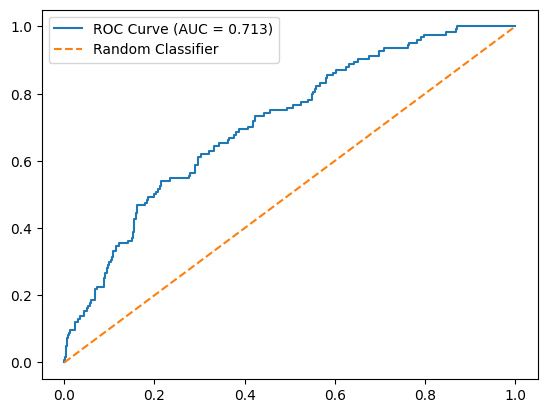

In [96]:
auc=roc_auc_score(y_test,y_prob)
plt.plot(fpr,tpr,label=f"ROC Curve (AUC = {round(auc,3)})")
plt.plot([0,1],[0,1],linestyle="--",label="Random Classifier")
plt.legend()
plt.show()

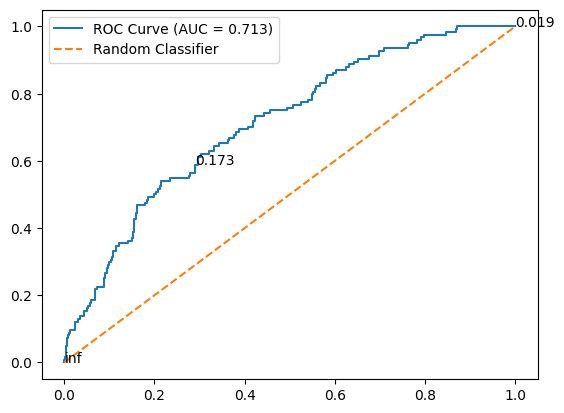

In [97]:
auc=roc_auc_score(y_test,y_prob)
plt.plot(fpr,tpr,label=f"ROC Curve (AUC = {round(auc,3)})")
plt.plot([0,1],[0,1],linestyle="--",label="Random Classifier")
threshold_idx= [0,len(thresholds)//2,-1]
for idx in threshold_idx:
  plt.annotate(f"{round(thresholds[idx],3)}",(fpr[idx],tpr[idx]))
plt.legend()
plt.show()

In [98]:
thresholds[1]

np.float64(0.8458709789281165)

In [99]:
y_prob=LR_model.predict_proba(X_test)[:,1]
threshold=0.17
y_pred_custom=(y_prob>=threshold).astype(int)
y_pred_custom

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6886792452830188
Precision: 0.2602739726027397
Recall: 0.6129032258064516
F1 Score: 0.36538461538461536


In [101]:
print(classification_report(y_test , y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       724
           1       0.26      0.61      0.37       124

    accuracy                           0.69       848
   macro avg       0.59      0.66      0.58       848
weighted avg       0.82      0.69      0.73       848



In [102]:
import pickle
pickle.dump(LR_model,open("model_LogisticRegression.pkl","wb"))